In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
dims = [f'dim{k}' for k in range(1,33)]
#emb_dir = '/neurospin/dico/jlaval/Output/test_augmented_embeddings/09-33-31_0/troiani_augmented_embeddings'
emb_dir = '/neurospin/dico/jlaval/Output/test_augmented_embeddings_cing/11-22-27_0/ukb_augmented_embeddings'
embs_dir = os.listdir(emb_dir)
embs_dir = [direc for direc in embs_dir if 'embeddings' in direc]

In [3]:
embs_list = []
for file in embs_dir:
    embs = pd.read_csv(os.path.join(emb_dir, file))
    embs_list.append(embs)
full_embs = pd.concat(embs_list)

In [4]:
subjects = embs['ID'].tolist()

In [5]:
means, medians, stds, maxs, quants = [], [], [], [], []
for subject in tqdm(subjects):
    sub_embs = full_embs.loc[full_embs['ID']==subject][dims] ### VERY LONG, DO full_embs[k,::n_subs][dims] instead !
    dists = pairwise_distances(sub_embs, metric='cosine')
    dists = dists[~np.eye(dists.shape[0], dtype=bool)]
    means.append(np.mean(dists))
    medians.append(np.median(dists))
    quants.append(np.quantile(dists, 0.95))
    maxs.append(np.max(dists))
    stds.append(np.std(dists))

 20%|█▉        | 8309/42433 [18:51<1:17:27,  7.34it/s]


KeyboardInterrupt: 

In [47]:
df_augmentation_stats = pd.read_csv(os.path.join(emb_dir, 'summary_stats.csv'), index_col='Subject')

In [39]:
#df_augmentation_stats = pd.DataFrame(data = np.array([means, medians, quants, maxs, stds]).T, columns=['Mean', 'Median', 'Q95', 'Max', 'Std'], index=subjects)

(array([7.8580e+03, 2.3009e+04, 8.8080e+03, 2.1240e+03, 4.9900e+02,
        1.0600e+02, 1.7000e+01, 6.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([0.00445294, 0.0145433 , 0.02463366, 0.03472403, 0.04481439,
        0.05490475, 0.06499511, 0.07508548, 0.08517584, 0.0952662 ,
        0.10535656]),
 <BarContainer object of 10 artists>)

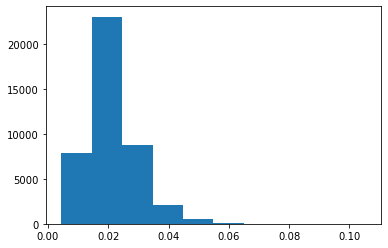

In [40]:
plt.hist(df_augmentation_stats['Mean'])

(array([1.9148e+04, 1.8169e+04, 4.3120e+03, 6.7800e+02, 1.0300e+02,
        1.5000e+01, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.00159092, 0.00982835, 0.01806579, 0.02630322, 0.03454066,
        0.04277809, 0.05101553, 0.05925296, 0.0674904 , 0.07572783,
        0.08396527]),
 <BarContainer object of 10 artists>)

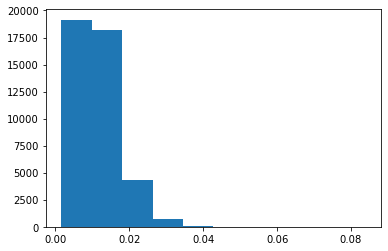

In [41]:
plt.hist(df_augmentation_stats['Median'])

(array([2.0892e+04, 1.4937e+04, 3.8260e+03, 1.5490e+03, 7.1900e+02,
        3.1500e+02, 1.3100e+02, 4.1000e+01, 1.9000e+01, 4.0000e+00]),
 array([0.00444154, 0.02147257, 0.0385036 , 0.05553463, 0.07256566,
        0.08959668, 0.10662771, 0.12365874, 0.14068977, 0.15772079,
        0.17475182]),
 <BarContainer object of 10 artists>)

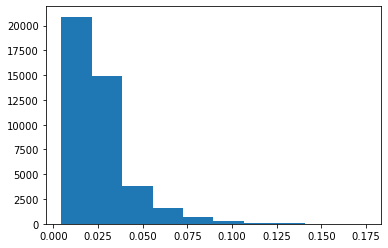

In [42]:
plt.hist(df_augmentation_stats['Std'])

In [44]:
df_augmentation_stats

,Unnamed: 0,Mean,Median,Q95,Max,Std
0,sub-1000021,0.014628,0.011449,0.038204,0.080919,0.012537
1,sub-1000325,0.016644,0.008484,0.054380,0.125297,0.019768
2,sub-1000458,0.021422,0.013903,0.068844,0.129394,0.021356
3,sub-1000575,0.008781,0.003822,0.035331,0.062673,0.010909
4,sub-1000606,0.022386,0.011392,0.062277,0.293244,0.041815
...,...,...,...,...,...,...
42428,sub-6023847,0.023951,0.014741,0.070521,0.199548,0.023573
42429,sub-6024038,0.009519,0.005400,0.028854,0.092265,0.011983
42430,sub-6024150,0.035934,0.016907,0.107351,0.428652,0.065493
42431,sub-6024379,0.032608,0.023104,0.101596,0.230505,0.032191


In [43]:
## analyse subs
df_augmentation_stats.sort_values(by='Median').index.tolist()[-40:]

[3111,
 17565,
 34039,
 3933,
 18293,
 35374,
 27421,
 4989,
 36775,
 17974,
 12264,
 21834,
 6382,
 30925,
 34911,
 16991,
 8779,
 27518,
 8071,
 7782,
 10549,
 27591,
 14329,
 24063,
 3513,
 24796,
 24378,
 15258,
 19729,
 41959,
 34143,
 32535,
 11093,
 760,
 10207,
 3903,
 35926,
 35126,
 25002,
 19819]